In [ ]:
import pandas as pd
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_all=np.load("drive/MyDrive/speaker/train_gray.npy")

X_all = X_all.astype('float16')
X_all = X_all/255

Y_all=pd.read_csv("drive/MyDrive/speaker/filelist.csv",index_col=0)

X_all.shape

Y_all.shape

test=np.loadtxt("drive/MyDrive/speaker/testing_list.txt",dtype="str")

test=np.char.replace(test,".wav","")

test=np.char.split(test,"/")

test_name=np.array([x[1] for x in test])
test_type=np.array([x[0] for x in test])

valid=np.loadtxt("drive/MyDrive/speaker/validation_list.txt",dtype="str")

valid=np.char.replace(valid,".wav","")

valid=np.char.split(valid,"/")

valid_name=np.array([x[1] for x in valid])
valid_type=np.array([x[0] for x in valid])

Y_all.Name=Y_all.Name.str.replace(".png","")

Y_all["Index"]=Y_all.index

valid=pd.DataFrame({"Name":valid_name,"Type":valid_type})

test=pd.DataFrame({"Name":test_name,"Type":test_type})

valid=pd.merge(Y_all,valid,on=["Name","Type"],how="right")

test=pd.merge(Y_all,test,on=["Name","Type"],how="right")

Y_all=Y_all[~Y_all.Index.isin(valid.Index)]
Y_all=Y_all[~Y_all.Index.isin(test.Index)]

x_train=X_all[Y_all.Index]

y_train=Y_all.Type.to_numpy()

classes=np.unique(y_train)

del X_all

del Y_all

In [ ]:
commands=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [ ]:
y_train[np.isin(y_train,commands,invert=True)]="unknown"

In [ ]:
noise=np.load("drive/MyDrive/speaker/noise_aug_grey_part.npy")

noise = noise.astype('float16')
noise = noise/255
noise.shape

(6288, 99, 161, 1)

In [ ]:
#noise=noise.reshape([noise.shape[0],99,161])

In [ ]:
x_train=np.concatenate((x_train, noise[0::2]))

In [ ]:
y_train = np.concatenate((y_train,np.repeat('silence', 3, axis=0)))

In [ ]:
from sklearn import preprocessing
pre = preprocessing.LabelEncoder()
pre.fit(y_train)
y_train = pre.transform(y_train)

In [ ]:
subtract_pixel_mean = True

In [ ]:
import tensorflow as tf
checkpoint_filepath = 'drive/MyDrive/speaker/checkpoint_model_lstm2'

In [ ]:
if subtract_pixel_mean:
    train_mean = np.mean(x_train, axis=0)

In [ ]:
del x_train
del y_train
del valid
del test

In [ ]:
x_test=np.load("drive/MyDrive/speaker/test_grey.npy")

In [ ]:
x_test = x_test.astype('float16',copy=False)

In [ ]:
x_test = x_test/255

In [ ]:
if subtract_pixel_mean:
    x_test -= train_mean

In [ ]:
x_test=x_test.reshape([x_test.shape[0],99,161])

In [ ]:
model = tf.keras.models.load_model(checkpoint_filepath)

In [ ]:
test_name=pd.read_csv("drive/MyDrive/speaker/filelist_test.csv",index_col=0)
test_name=test_name.Name.str.replace(".png",".wav").to_numpy()

In [ ]:
import time

In [ ]:
for i in range(5,6):
  print(i)
  subset=x_test[i::6]
  pred=np.argmax(model.predict(subset,batch_size=1000),axis=1)
  pred=pre.inverse_transform(pred)
  results=pd.DataFrame({"fname":test_name[i::6],"label":pred})
  results.to_csv("drive/MyDrive/speaker/results"+str(i)+".csv",index=None)
  model.reset_states()
  del pred
  del results
  del subset
  subset=0
  time.sleep(10)

5


In [ ]:
res0=pd.read_csv("drive/MyDrive/speaker/results0.csv")
res1=pd.read_csv("drive/MyDrive/speaker/results1.csv")
res2=pd.read_csv("drive/MyDrive/speaker/results2.csv")
res3=pd.read_csv("drive/MyDrive/speaker/results3.csv")
res4=pd.read_csv("drive/MyDrive/speaker/results4.csv")
res5=pd.read_csv("drive/MyDrive/speaker/results5.csv")

In [ ]:
total_results=pd.concat([res0,res1,res2,res3,res4,res5])

In [ ]:
total_results.to_csv("drive/MyDrive/speaker/results.csv",index=None)

In [ ]:
import tensorflow as tf
checkpoint_filepath = 'drive/MyDrive/speaker/checkpoint_model_lstm2'
model = tf.keras.models.load_model(checkpoint_filepath)

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: ignored

In [ ]:
model.history.history

AttributeError: ignored

In [ ]:
from keras.utils.vis_utils import plot_model

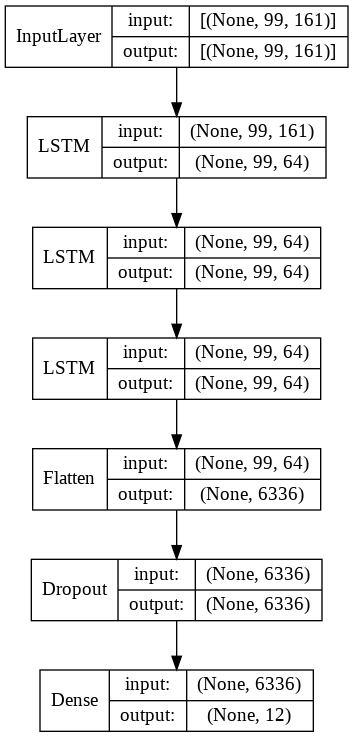

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)